##### 1.4.13 Hough Line Transform

In [31]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import pyplot as plt

In [32]:
img = cv2.imread('sIMG_2164.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
 
lines = cv2.HoughLines(edges,1,np.pi/180,300)

In [33]:
lines   # 라인 갯수

array([[[ 406.       ,    1.5707964]],

       [[ 409.       ,    1.5707964]],

       [[  84.       ,    1.5707964]],

       ...,

       [[-979.       ,    3.0892327]],

       [[-964.       ,    3.1241393]],

       [[ -62.       ,    3.1241393]]], dtype=float32)

In [34]:
lines[0:2].shape

(2, 1, 2)

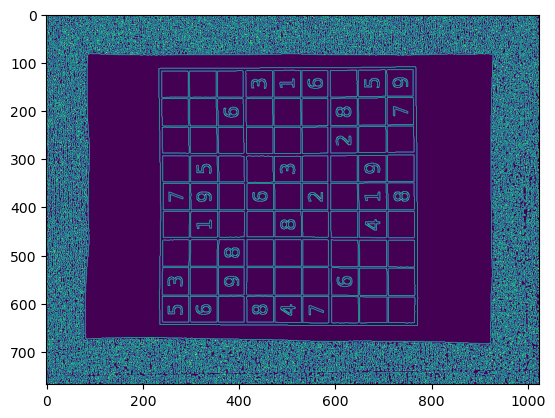

In [35]:
plt.imshow(edges)

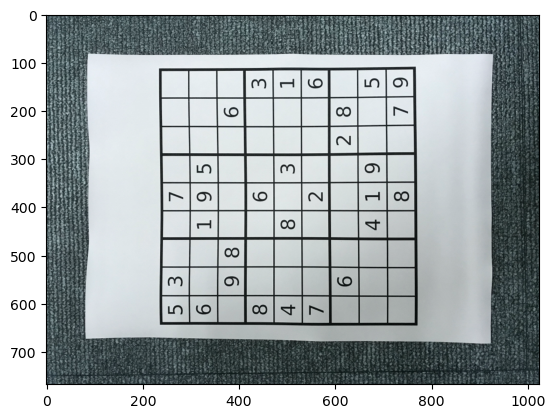

In [36]:
plt.imshow(img)

 Hough Tranform in OpenCV

In [37]:

for i in range(500):
    for rho,theta in lines[i]:   # 50개만 찍어봄
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0- 1000*(-b))
        y2 = int(y0- 1000*(a))
 
        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
cv2.imwrite('houghlines3.jpg',img)

True

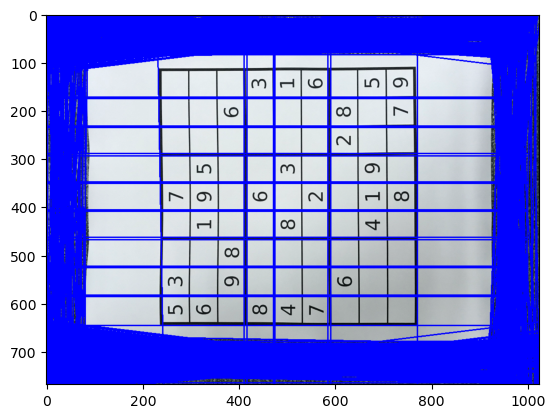

In [38]:
plt.imshow(img)

In [39]:
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)

In [40]:
lines.shape

(376, 1, 4)

 Probabilistic Hough Transform

In [41]:
for i in range(50):
    for x1,y1,x2,y2 in lines[i]:
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
    cv2.imwrite('houghlines5.jpg',img)

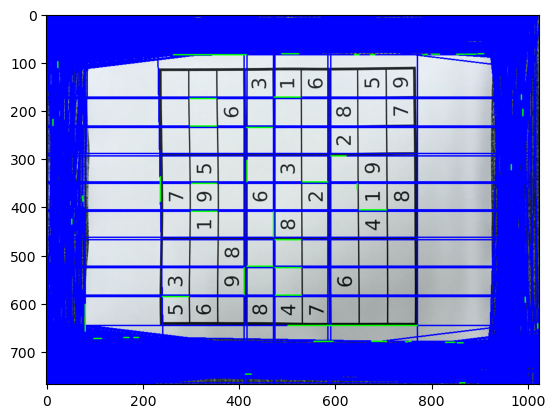

In [42]:
plt.imshow(img)

In [43]:
def nothing(x):
    pass

In [44]:
img = cv2.imread('sIMG_2164.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
lineNums = 100

In [45]:
# Create a black image,a window

cv2.namedWindow('image')

#create trackbars for color change
cv2.createTrackbar('minLineLength','image',0,500,nothing) # R이라는 트렉터를 0부터 255까지
cv2.createTrackbar('maxLineGap','image',0,500,nothing)
cv2.createTrackbar('lineNums','image',0,100,nothing)
cv2.setTrackbarPos('minLineLength', 'image', minLineLength)
cv2.setTrackbarPos('maxLineGap', 'image', maxLineGap)
cv2.setTrackbarPos('lineNums', 'image', lineNums)
 
while(1):
    cv2.imshow('image',img)
    k=cv2.waitKey(1)&0xFF
    if k== 27:
        break  

    #get current positions off our trackbars
    minLineLength=cv2.getTrackbarPos('minLineLength','image')   # 선의 길이
    maxLineGap=cv2.getTrackbarPos('maxLineGap','image')
    lineNums=cv2.getTrackbarPos('lineNums','image') # 선 갯수
    lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
    lineNum = min(lineNums, lines.shape[0])

    for i in range(lineNum):
        for x1,y1,x2,y2 in lines[i]:
            cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
 

cv2.destroyAllWindows()